<a href="https://colab.research.google.com/github/mel0ca/Traffic-Analysis/blob/main/IVT-Pattern-Across-App-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
url = "https://drive.google.com/uc?export=download&id=1hCwJYx7xyeCo0zXepWGJJwgGPCsXzJqx"
df = pd.read_csv(url)

print("Loaded Data")
df.head()

Loaded Data


,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,2025-09-11 14:00:00,14361,14354,158,21888,1.524128,0,0,1.000488,90.892405,0.000000
1,2025-09-11 15:00:00,9305,9303,115,10019,1.076733,0,0,1.000215,80.913043,0.000000
2,2025-09-11 16:00:00,11985,11981,144,12869,1.073759,0,0,1.000334,83.229167,0.000000
3,2025-09-11 17:00:00,11252,11250,127,12057,1.071543,0,0,1.000178,88.598425,0.008621
4,2025-09-11 18:00:00,10502,10498,103,11363,1.081984,0,0,1.000381,101.961165,0.000000


Data Cleaning: Removing extra spaces

In [78]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

Date to datetime conversion

In [80]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df.head()

,Total Data Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,NaT,1191603,1189884,28,1770702,1.485983,0,0,1.001445,42557.250000,0.004276
1,2025-09-11,93345,93340,22,99280,1.063581,0,0,1.000054,4242.954545,0.003456
2,2025-09-12,515646,515307,25,649515,1.259614,0,0,1.000658,20625.840000,0.003409
3,2025-09-13,406993,406729,25,473346,1.163032,0,0,1.000649,16279.720000,0.006033
4,2025-09-14,400917,400668,26,467152,1.165209,0,0,1.000621,15419.884620,0.003836


In [81]:
# Checking for Missing values
print(df.isnull().sum())

Date                    0
unique_idfas            0
unique_ips              0
unique_uas              0
total_requests          0
requests_per_idfa       0
impressions             0
impressions_per_idfa    0
idfa_ip_ratio           0
idfa_ua_ratio           0
IVT                     0
dtype: int64


In [82]:

# Checking for Non Null values and Datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  84 non-null     datetime64[ns]
 1   unique_idfas          84 non-null     int64         
 2   unique_ips            84 non-null     int64         
 3   unique_uas            84 non-null     int64         
 4   total_requests        84 non-null     int64         
 5   requests_per_idfa     84 non-null     float64       
 6   impressions           84 non-null     int64         
 7   impressions_per_idfa  84 non-null     int64         
 8   idfa_ip_ratio         84 non-null     float64       
 9   idfa_ua_ratio         84 non-null     float64       
 10  IVT                   84 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 7.3 KB
None


In [83]:
df.describe()

,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
count,84,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.0,84.000000,84.000000,84.000000
mean,2025-09-13 07:29:59.999999744,10909.095238,10905.345238,141.892857,11770.202381,1.074001,0.0,0.0,1.000330,77.729143,0.535350
min,2025-09-11 14:00:00,2662.000000,2662.000000,93.000000,2753.000000,1.015625,0.0,0.0,1.000000,21.467742,0.000000
25%,2025-09-12 10:45:00,9027.750000,9024.250000,116.750000,9666.250000,1.052513,0.0,0.0,1.000174,59.609987,0.004818
50%,2025-09-13 07:30:00,10547.000000,10543.000000,144.000000,11402.500000,1.075487,0.0,0.0,1.000329,77.718272,0.979577
75%,2025-09-14 04:15:00,11762.500000,11758.250000,161.250000,12717.250000,1.086343,0.0,0.0,1.000483,95.279174,1.000000
max,2025-09-15 01:00:00,27986.000000,27978.000000,199.000000,30114.000000,1.524128,0.0,0.0,1.000976,149.657754,1.000000
std,NaN,4423.277293,4421.883632,28.853606,4943.227605,0.054346,0.0,0.0,0.000218,25.971076,0.493211


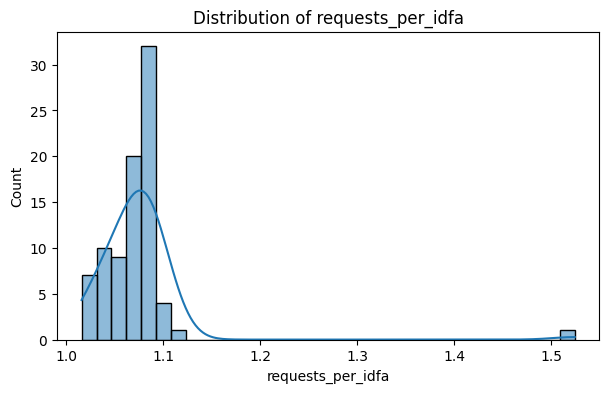

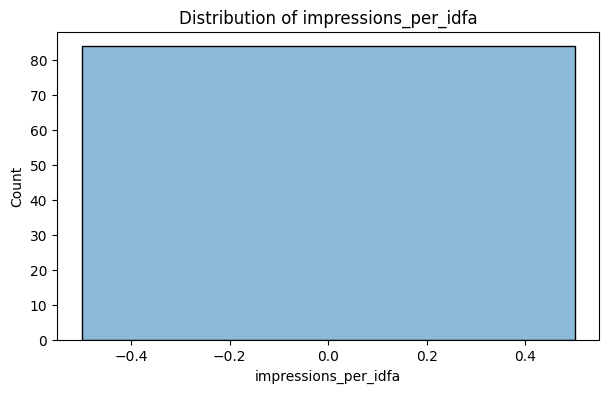

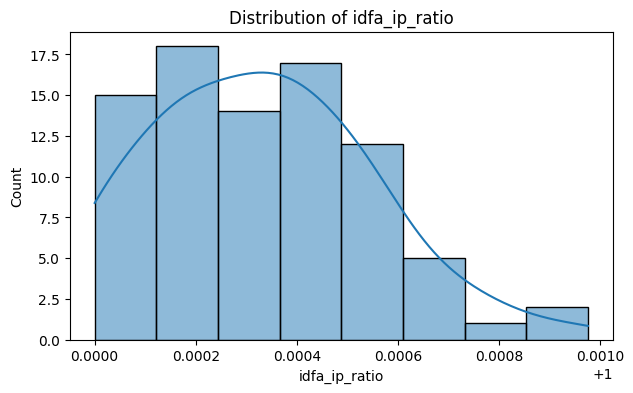

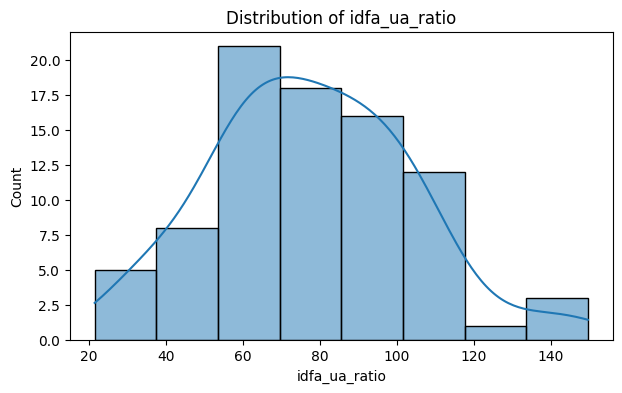

In [84]:
parameters = ['requests_per_idfa', 'impressions_per_idfa', 'idfa_ip_ratio', 'idfa_ua_ratio']

for i in parameters:
    plt.figure(figsize=(7,4))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

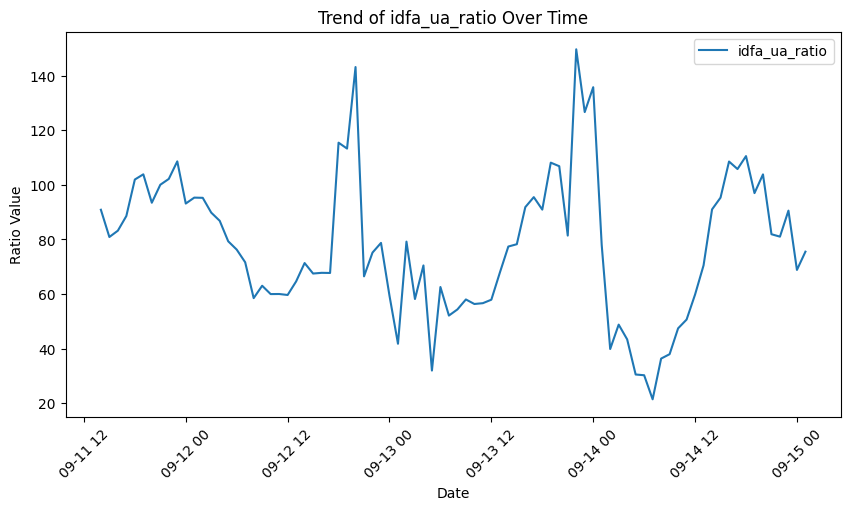

In [85]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['idfa_ua_ratio'], label='idfa_ua_ratio')
plt.legend()
plt.title("Trend of idfa_ua_ratio Over Time")
plt.xlabel("Date")
plt.ylabel("Ratio Value")
plt.xticks(rotation=45)
plt.show()

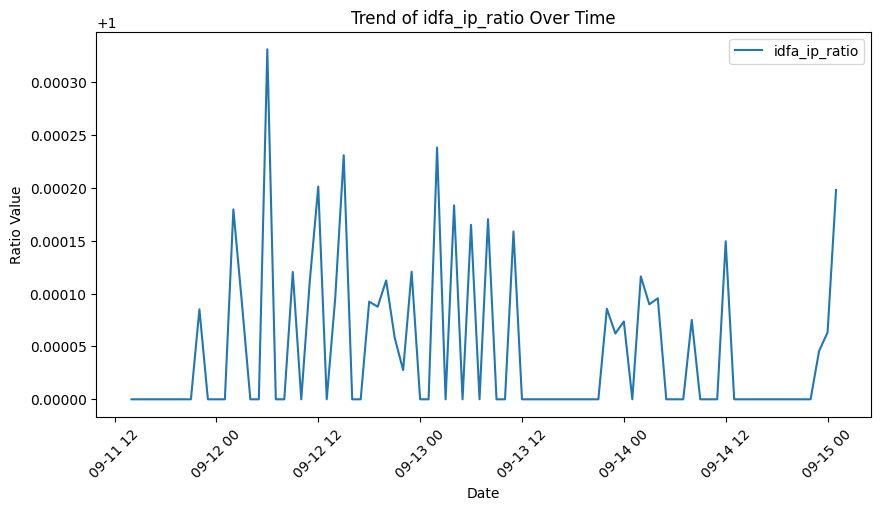

In [73]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['idfa_ip_ratio'], label='idfa_ip_ratio')
plt.legend()
plt.title("Trend of idfa_ip_ratio Over Time")
plt.xlabel("Date")
plt.ylabel("Ratio Value")
plt.xticks(rotation=45)
plt.show()

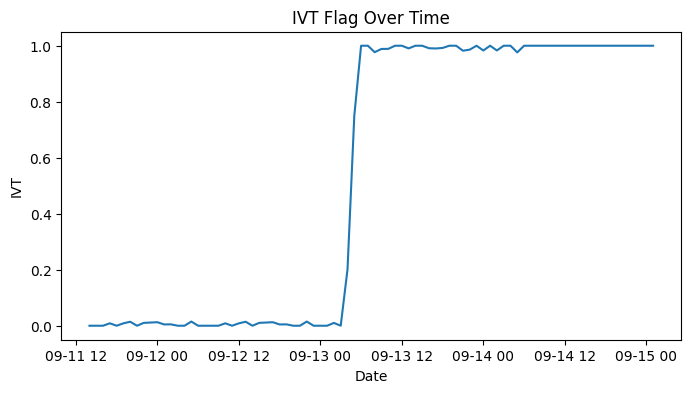

In [86]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='Date', y='IVT')
plt.title("IVT Flag Over Time")
plt.show()

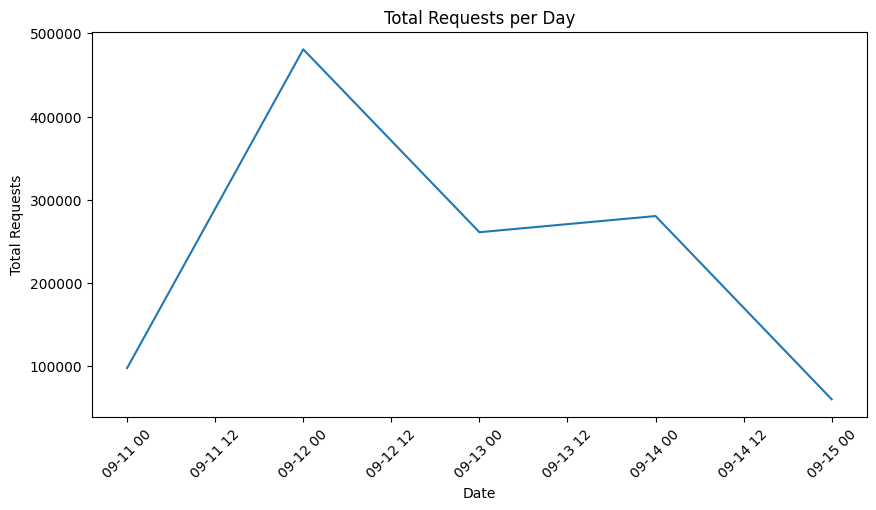

In [87]:
plt.figure(figsize=(10,5))
daily_requests.plot(kind='line')
plt.title("Total Requests per Day")
plt.xlabel("Date")
plt.ylabel("Total Requests")
plt.xticks(rotation=45)
plt.show()

In [88]:
daily_requests = df.groupby(df['Date'].dt.date)['total_requests'].sum()
print("Total Requests per Day:")
print(daily_requests)

Total Requests per Day:
Date
2025-09-11    126158
2025-09-12    321354
2025-09-13    280286
2025-09-14    237432
2025-09-15     23467
Name: total_requests, dtype: int64


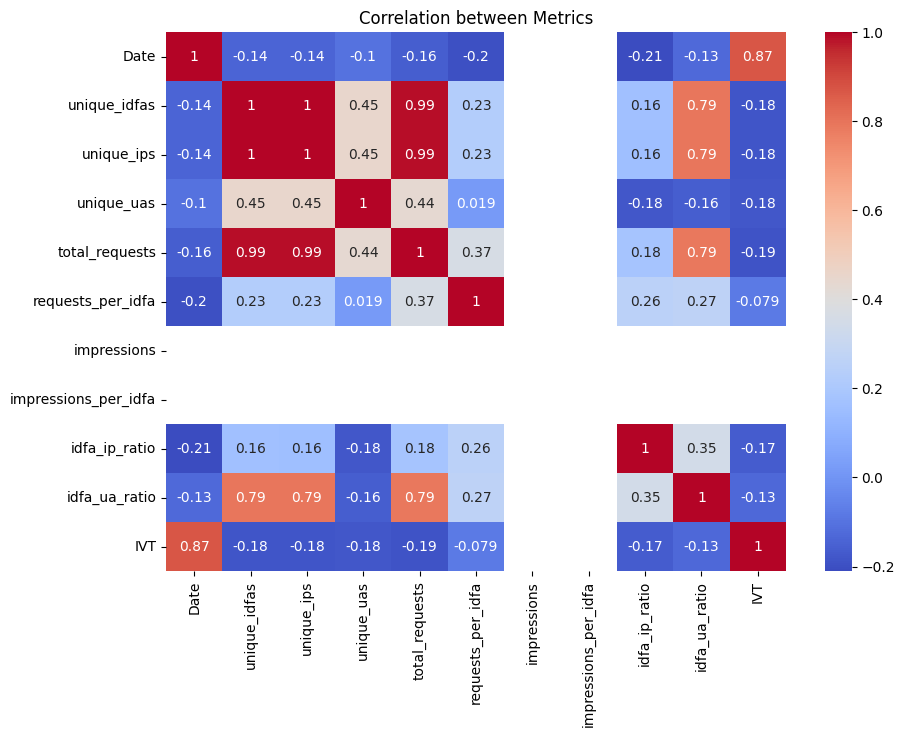

In [89]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Metrics")
plt.show()

### Graph-Based Insights: Clear Indicators of IVT

Based on the visualizations, here's what we can see about the ad traffic data:

*   **Requests per IDFA:** This metric is mostly stable around 1, which is expected for normal user behavior. Minor variations are observed, but nothing that screams "invalid traffic" on its own.
*   **Impressions per IDFA:** This is a critical observation. The plots consistently show that `impressions_per_idfa` is flat at 0. This indicates that a significant number of ad requests are being made without resulting in any ad impressions being served. This is a strong red flag for invalid traffic, as legitimate ad interactions should lead to impressions.
*   **IDFA-IP Ratio:** This ratio is consistently close to 1 across different time periods and in the distribution plot. This suggests that unique devices are generally associated with unique IP addresses, which is a normal pattern and not a significant factor indicating IVT in this dataset.
*   **IDFA-UA Ratio:** This is another key indicator. The time series plot of the `idfa_ua_ratio` shows clear and significant spikes. These spikes represent periods where a large number of unique devices are reporting the same User-Agent string. This is highly unusual for genuine user traffic and is a very strong signal of device spoofing or other forms of fraudulent activity, pointing towards IVT.
*   **IVT Trend:** The plot of the IVT flag over time shows that there are periods where IVT is detected. Crucially, these peaks in the IVT flag visually correspond with the large spikes observed in the `idfa_ua_ratio` plot. This strong visual correlation, supported by the heatmap showing a high positive correlation, indicates that the detection system is likely flagging traffic based on this irregular device-to-user-agent behavior.

In summary, the combination of zero impressions per IDFA and the clear spikes in `idfa_ua_ratio` that align with the IVT flag strongly indicate the presence of invalid traffic within this dataset.

### Conclusion: Clear Evidence of Invalid Traffic (IVT)

Based on the comprehensive analysis of the ad traffic data through various visualizations and the correlation heatmap, there is clear evidence of Invalid Traffic (IVT) present in the dataset.

The most compelling indicators are:

*   **Consistent Zero Impressions:** The consistent lack of impressions despite ad requests being made (shown by the `impressions_per_idfa` being zero) is a fundamental characteristic of traffic that is not genuine and is likely being generated programmatically or fraudulently without actual human viewing.
*   **Spikes in IDFA-UA Ratio:** The significant spikes in the `idfa_ua_ratio` directly point to unusual device behavior, specifically a high number of unique devices sharing the same User-Agent. This pattern is a strong signature of device spoofing or bot activity, which are common forms of IVT.
*   **Correlation with IVT Flag:** The strong visual and statistical correlation between the `idfa_ua_ratio` spikes and the periods where the IVT flag is active confirms that the observed anomalies are indeed being identified as invalid traffic by the detection system.

While other metrics like `requests_per_idfa` and `idfa_ip_ratio` appear relatively normal, the combination of zero impressions and the distinct patterns in the `idfa_ua_ratio` provides a clear and compelling picture of invalid traffic. The analysis demonstrates that the IVT detection system in this case is effectively identifying traffic exhibiting these specific, anomalous behaviors.